# scikit-learn中的多项式回归和pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [4]:
X2.shape

(100, 3)

In [5]:
X2[:5]

array([[ 1.00000000e+00,  1.25036977e-02,  1.56342456e-04],
       [ 1.00000000e+00, -2.11564187e+00,  4.47594052e+00],
       [ 1.00000000e+00,  2.94805780e+00,  8.69104480e+00],
       [ 1.00000000e+00,  6.93467237e-01,  4.80896809e-01],
       [ 1.00000000e+00,  1.34184252e+00,  1.80054135e+00]])

In [6]:
X[:5]

array([[ 0.0125037 ],
       [-2.11564187],
       [ 2.9480578 ],
       [ 0.69346724],
       [ 1.34184252]])

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_predict = lin_reg.predict(X2)

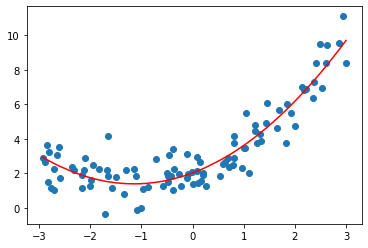

In [8]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")
plt.show()

In [9]:
lin_reg.coef_

array([0.       , 1.1088314, 0.4839934])

In [10]:
lin_reg.intercept_

2.0231051135001263

# 关于PolynomialFeatures

In [11]:
X = np.arange(1, 11).reshape(-1, 2)

In [12]:
X.shape

(5, 2)

In [13]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
poly2 = PolynomialFeatures(degree=2)
poly2.fit(X)
X2 = poly2.transform(X)

In [21]:
X2.shape

(5, 6)

In [22]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [24]:
poly3 = PolynomialFeatures(degree=3)
poly3.fit(X)
X3 = poly3.transform(X)
print(X3.shape)
print(X3)

(5, 10)
[[   1.    1.    2.    1.    2.    4.    1.    2.    4.    8.]
 [   1.    3.    4.    9.   12.   16.   27.   36.   48.   64.]
 [   1.    5.    6.   25.   30.   36.  125.  150.  180.  216.]
 [   1.    7.    8.   49.   56.   64.  343.  392.  448.  512.]
 [   1.    9.   10.   81.   90.  100.  729.  810.  900. 1000.]]


# Pipeline

In [25]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [27]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

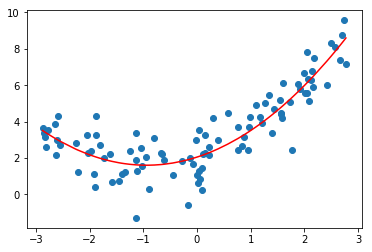

In [29]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")
plt.show()